<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>

</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(plans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
# Imprime una muestra de los datos para las tarifas
print(plans.head()) 


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Después de analizar la estructura del DataFrame "plans", hay varias observaciones clave que pueden afectar el análisis:

-*Observaciones generales sobre los datos*
-Estructura y tipos de datos:  
*La tabla contiene información sobre las tarifas "Surf" y "Ultimate", con datos sobre precios y límites de minutos, mensajes y datos.
*Es fundamental verificar que todas las columnas numéricas ("usd_monthly_fee", "minutes_included", etc.) sean de tipo "int" o "float". Si aparecen como "object", habrá que convertirlas.

-*Valores nulos o faltantes:*  
*En este dataset no se esperaría que haya valores "NaN", ya que las tarifas deberían tener información completa.
*Si hay valores faltantes, podría indicar errores en la recopilación de datos o registros incompletos.

-*En la parte de duplicados:* 
*La tabla debería contener solo dos registros (Surf y Ultimate). Si encontramos más filas, podría haber duplicaciones.

-*Errores en los valores:*
*Los precios y límites deben coincidir con la descripción del proyecto.
*Se debe verificar si los precios por minuto, mensaje y GB son correctos, comparándolos con la documentación de Megaline.

-*¿Como lo solucionaré?*

Verificaré los nombres de las columnas y corregiré el error en 'usd_monthly_fee', que en realidad es 'usd_monthly_pay'. Para las columnas numéricas debo de asegurarme de que los datos estén en el formato adecuado. Eliminamos posibles valores nulos para evitar inconsistencias. Depuramos duplicados, dejando solo los registros correctos.

## Corregir datos

In [5]:
# Verificar los nombres de las columnas
print(plans.columns)

# Limpiar espacios en nombres de columnas por si acaso
plans.columns = plans.columns.str.strip()

# Lista de columnas numéricas que deben ser convertidas
num_cols = ['usd_monthly_pay', 'minutes_included', 'messages_included', 
            'mb_per_month_included', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']

# Convertir columnas numéricas si están en formato incorrecto
for col in num_cols:
    if col in plans.columns:  # Verificar que la columna existe antes de convertir
        plans[col] = pd.to_numeric(plans[col], errors='coerce')

# Eliminar valores nulos si los hay
plans.dropna(inplace=True)

# Eliminar duplicados si existen
plans.drop_duplicates(inplace=True)

print("Datos corregidos y listos para el análisis.")

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')
Datos corregidos y listos para el análisis.


## Enriquecer los datos

In [6]:
print(users.columns)
minutes_per_user = calls.groupby('user_id')['duration'].sum().reset_index()
minutes_per_user.rename(columns={'duration': 'minutes_used'}, inplace=True)

messages_per_user = messages.groupby('user_id')['id'].count().reset_index()
messages_per_user.rename(columns={'id': 'messages_sent'}, inplace=True)

data_per_user = internet.groupby('user_id')['mb_used'].sum().reset_index()
data_per_user.rename(columns={'mb_used': 'data_used_gb'}, inplace=True)
data_per_user['data_used_gb'] = (data_per_user['data_used_gb'] / 1024).round(2)  # Convertir MB a GB

users = users.merge(minutes_per_user, on='user_id', how='left')
users = users.merge(messages_per_user, on='user_id', how='left')
users = users.merge(data_per_user, on='user_id', how='left')

users.fillna({'minutes_used': 0, 'messages_sent': 0, 'data_used_gb': 0}, inplace=True)

print(users.head())  

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  minutes_used  messages_sent  data_used_gb  
0  2018-12-24  ultimate        NaN        116.83           11.0          1.86  
1  2018-08-13      surf        NaN       1640.46          207.0         78.55  
2  2018-10-21      surf        NaN        777.13           88.0         39.35  
3  2018-01-28      surf        NaN       1041.00           50.0         26.

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(users.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        500 non-null    int64  
 1   first_name     500 non-null    object 
 2   last_name      500 non-null    object 
 3   age            500 non-null    int64  
 4   city           500 non-null    object 
 5   reg_date       500 non-null    object 
 6   plan           500 non-null    object 
 7   churn_date     34 non-null     object 
 8   minutes_used   500 non-null    float64
 9   messages_sent  500 non-null    float64
 10  data_used_gb   500 non-null    float64
dtypes: float64(3), int64(2), object(6)
memory usage: 46.9+ KB
None


In [8]:
# Imprime una muestra de datos para usuarios
print(users.head())


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  minutes_used  messages_sent  data_used_gb  
0  2018-12-24  ultimate        NaN        116.83           11.0          1.86  
1  2018-08-13      surf        NaN       1640.46          207.0         78.55  
2  2018-10-21      surf        NaN        777.13           88.0         39.35  
3  2018-01-28      surf        NaN       1041.00           50.0         26.41  
4  2018-05-23      surf        NaN       2618.95          177.0        152.69  


La tabla contiene **500 registros** de usuarios con **11 columnas**, mostrando detalles sobre su identidad, ubicación, actividad y consumo de recursos. Algunas observaciones importantes:

**Datos correctamente estructurados:**  
   - `user_id`, `age` → Son **numéricos**, lo cual es adecuado.  
   - `first_name`, `last_name`, `city`, `plan` → Son **objetos**, ya que representan texto.  
   - `minutes_used`, `messages_sent`, `data_used_gb` → Son **float64**, lo que permite cálculos precisos.  

**Valores nulos en `churn_date`**  
   - Esta columna solo tiene **34 valores**, lo que significa que **466 usuarios siguen activos** en el servicio.  
   - `NaN` en `churn_date` es esperado, ya que indica que el usuario no ha cancelado su tarifa.  

**Posible solución:**  
- **Convertir `reg_date` y `churn_date`** a formato `datetime` para análisis más eficiente:  
  ```python
  users['reg_date'] = pd.to_datetime(users['reg_date'])
  users['churn_date'] = pd.to_datetime(users['churn_date'])
  ```
- **Ver la distribución del consumo** (minutos, mensajes, datos) para comprender mejor el comportamiento de los usuarios.

### Corregir los datos

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
print(users.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        500 non-null    int64         
 1   first_name     500 non-null    object        
 2   last_name      500 non-null    object        
 3   age            500 non-null    int64         
 4   city           500 non-null    object        
 5   reg_date       500 non-null    datetime64[ns]
 6   plan           500 non-null    object        
 7   churn_date     34 non-null     datetime64[ns]
 8   minutes_used   500 non-null    float64       
 9   messages_sent  500 non-null    float64       
 10  data_used_gb   500 non-null    float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 46.9+ KB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
# Calcular percentiles para minutos, mensajes y datos
minutes_q = users['minutes_used'].quantile([0.33, 0.66])
messages_q = users['messages_sent'].quantile([0.33, 0.66])
data_q = users['data_used_gb'].quantile([0.33, 0.66])

def categorize_usage(row):
    if (row['minutes_used'] < minutes_q[0.33] and 
        row['messages_sent'] < messages_q[0.33] and 
        row['data_used_gb'] < data_q[0.33]):
        return 'Bajo uso'
    elif (row['minutes_used'] < minutes_q[0.66] and 
          row['messages_sent'] < messages_q[0.66] and 
          row['data_used_gb'] < data_q[0.66]):
        return 'Uso moderado'
    else:
        return 'Uso intensivo'

users['usage_category'] = users.apply(categorize_usage, axis=1)

print(users[['user_id', 'plan', 'usage_category']].head())

   user_id      plan usage_category
0     1000  ultimate       Bajo uso
1     1001      surf  Uso intensivo
2     1002      surf   Uso moderado
3     1003      surf   Uso moderado
4     1004      surf  Uso intensivo


## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(calls.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [12]:
# Imprime una muestra de datos para las llamadas
print(calls.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


**Observaciones sobre la información general del DataFrame `calls`:**

**Lo que está correcto**
-Cantidad de registros adecuada → Se tienen **137,735 llamadas**, lo que parece ser un volumen adecuado para análisis.  
-Valores completos → No hay valores nulos en ninguna columna (`id`, `user_id`, `call_date`, `duration`).  
-Formato correcto en `user_id` y `duration` → `user_id` está en `int64`, lo cual es correcto, y `duration` está en `float64`, permitiendo cálculos numéricos.  

**Problemas detectados**
-**"Formato incorrecto en `call_date`"** → La columna está en tipo `object` en lugar de `datetime64`, lo que dificulta cálculos con fechas. **Solución:** 
Convertir la columna al formato correcto:
"calls['call_date'] = pd.to_datetime(calls['call_date'])""

-**"El identificador de llamadas (`id`) está en `object`"** → Aunque no es necesariamente un error, conviene verificar si `id` contiene valores numéricos o si es un identificador alfanumérico. **Solución:** Si el `id` es solo un código y no se usará en cálculos, **no necesita conversión**. Si debe ser numérico: "calls['id'] = pd.to_numeric(calls['id'], errors='ignore')"

**Observaciones sobre la muestra de datos**

Al revisar las primeras filas de `calls`, vemos que:
**Los valores parecen coherentes** → `duration` varía entre 4.22 y 14.48 minutos en la muestra.  
**Las fechas parecen correctas** → `call_date` muestra llamadas registradas en **2018**, lo que coincide con los datos de usuarios.  
**Duración decimal podría causar problemas** → Megaline cobra por minuto completo, por lo que es necesario **redondear las llamadas al minuto más cercano**. **Solución:** import numpy as np
calls['duration'] = calls['duration'].apply(lambda x: np.ceil(x))  # Redondear hacia arriba, esto garantizará que cada llamada refleje el **costo correcto** según la política de facturación de Megaline.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
calls['duration'] = calls['duration'].apply(lambda x: np.ceil(x))

calls['call_date'] = pd.to_datetime(calls['call_date'])

print("Duplicados:", calls.duplicated().sum())  # Verificar cuántos duplicados existen
calls.drop_duplicates(inplace=True)  # Eliminar duplicados si los hay

print("Valores nulos en duration:", calls['duration'].isnull().sum())  # Revisar valores nulos
calls['duration'].fillna(0, inplace=True)  # Reemplazar valores nulos con 0 si los hay

print(calls['duration'].describe())  # Ver estadística general de duración

Duplicados: 0
Valores nulos en duration: 0
count    137735.000000
mean          7.146673
std           5.953919
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
calls['duration'] = calls['duration'].apply(lambda x: np.ceil(x))

calls['call_date'] = pd.to_datetime(calls['call_date'])

print("Duplicados en llamadas:", calls.duplicated().sum())
calls.drop_duplicates(inplace=True)

print("Valores nulos en duración:", calls['duration'].isnull().sum())
calls['duration'].fillna(0, inplace=True)

users = users.merge(plans, left_on='plan', right_on='plan_name', how='left')

users['extra_minutes'] = (users['minutes_used'] - users['minutes_included']).clip(lower=0)
users['extra_messages'] = (users['messages_sent'] - users['messages_included']).clip(lower=0)
users['extra_data_gb'] = (users['data_used_gb'] - (users['mb_per_month_included'] / 1024)).clip(lower=0)

users['extra_cost_minutes'] = users['extra_minutes'] * users['usd_per_minute']
users['extra_cost_messages'] = users['extra_messages'] * users['usd_per_message']
users['extra_cost_data'] = users['extra_data_gb'] * users['usd_per_gb']

users['total_revenue'] = users['usd_monthly_pay'] + users['extra_cost_minutes'] + users['extra_cost_messages'] + users['extra_cost_data']

print(users[['user_id', 'plan', 'total_revenue']].head())

Duplicados en llamadas: 0
Valores nulos en duración: 0
   user_id      plan  total_revenue
0     1000  ultimate        70.0000
1     1001      surf       694.4238
2     1002      surf       272.9539
3     1003      surf       150.3300
4     1004      surf      1464.2785


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [16]:
# Imprime una muestra de datos para los mensajes
print(messages.head())


         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


Observaciones clave:

**Estructura del DataFrame** → Contiene **76,051 registros**, lo que proporciona un buen volumen de información para el análisis.  
**Datos completos** → No hay valores nulos en ninguna columna (`id`, `user_id`, `message_date`).  
**Formato adecuado en `user_id`** → Está correctamente almacenado como un número entero (`int64`).  
**Fechas de los mensajes** → Todas parecen pertenecer a diciembre de 2018, lo que concuerda con el periodo de análisis.  

**Posibles problemas y soluciones**
**`message_date` está en formato `object` en lugar de `datetime64`**, lo que puede dificultar cálculos con fechas.  
**Solución:** Convertirlo a `datetime64` para facilitar el análisis

**La columna `id` tiene valores como "1000_125", lo que parece ser una combinación de `user_id` y otro identificador**.  
**Solución:** Si es necesario separar el identificador del usuario y el número del mensaje, podemos dividir la cadena

**Verificar si hay valores faltantes en alguna columna**  
**Solución:** Ejecutar un chequeo rápido para ver si hay datos incompletos. Una vez corregidos los posibles errores, podemos: Analizar el volumen de mensajes enviados por cada usuario, Comparar el uso de mensajes entre clientes de Surf y Ultimate, Visualizar tendencias de consumo con gráficos.  

### Corregir los datos

In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

messages[['user_id_extracted', 'message_id']] = messages['id'].str.split('_', expand=True)
messages['message_id'] = pd.to_numeric(messages['message_id'], errors='ignore')

print(messages.isnull().sum())

print("Duplicados en mensajes:", messages.duplicated().sum()) 
messages.drop_duplicates(inplace=True) 

id                   0
user_id              0
message_date         0
user_id_extracted    0
message_id           0
dtype: int64
Duplicados en mensajes: 0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
users['extra_minutes'] = (users['minutes_used'] - users['minutes_included']).clip(lower=0)
users['extra_messages'] = (users['messages_sent'] - users['messages_included']).clip(lower=0)
users['extra_data_gb'] = (users['data_used_gb'] - (users['mb_per_month_included'] / 1024)).clip(lower=0)

users['extra_cost_minutes'] = users['extra_minutes'] * users['usd_per_minute']
users['extra_cost_messages'] = users['extra_messages'] * users['usd_per_message']
users['extra_cost_data'] = users['extra_data_gb'] * users['usd_per_gb']

users['total_revenue'] = users['usd_monthly_pay'] + users['extra_cost_minutes'] + users['extra_cost_messages'] + users['extra_cost_data']

def categorize_usage(row):
    if row['minutes_used'] < 500 and row['data_used_gb'] < 10:
        return 'Usuarios ocasionales'
    elif row['minutes_used'] > 1500 or row['data_used_gb'] > 50:
        return 'Usuarios pesados'
    else:
        return 'Usuarios regulares'

users['usage_pattern'] = users.apply(categorize_usage, axis=1)

city_usage = users.groupby('city').agg({'minutes_used': 'mean', 'messages_sent': 'mean', 'data_used_gb': 'mean'})
print(city_usage.sort_values('minutes_used', ascending=False))


                                                minutes_used  messages_sent  \
city                                                                          
Greensboro-High Point, NC MSA                    5036.380000     444.000000   
Kansas City, MO-KS MSA                           3663.390000     305.500000   
Minneapolis-St. Paul-Bloomington, MN-WI MSA      3218.173636     312.272727   
Memphis, TN-MS-AR MSA                            3206.180000     121.500000   
Bridgeport-Stamford-Norwalk, CT MSA              3110.010000      42.333333   
...                                                      ...            ...   
Jacksonville, FL MSA                              483.360000     152.000000   
Milwaukee-Waukesha, WI MSA                        468.396667      92.666667   
Virginia Beach-Norfolk-Newport News, VA-NC MSA    467.632500      41.750000   
Cape Coral-Fort Myers, FL MSA                     392.710000      66.000000   
Omaha-Council Bluffs, NE-IA MSA                   13


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(internet.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [20]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.head())


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


**Estructura adecuada** → El DataFrame contiene información relevante sobre las sesiones de internet de los usuarios, incluyendo el identificador (`id`), fecha (`session_date`) y datos utilizados (`mb_used`).  
**Tipos de datos correctos en `user_id` y `mb_used`** → `user_id` está en formato numérico (`int64`), lo cual es correcto, y `mb_used` es un número decimal (`float64`) que permite cálculos precisos.  
**Fechas aparentemente coherentes** → `session_date` muestra un rango lógico de fechas, lo cual indica que el registro de sesiones está funcionando adecuadamente.  

**Posibles problemas y soluciones**  
**Formato de `session_date`** → Está en tipo `object` en lugar de `datetime64`, lo que puede dificultar cálculos con fechas.  
**Solución:** Convertir la columna para facilitar análisis de tiempo: "internet['session_date'] = pd.to_datetime(internet['session_date'])"

**Verificación de valores nulos en `mb_used`** → Es recomendable verificar si hay datos faltantes en la cantidad de MB utilizados.  
**Solución:** Realizar una inspección rápida: "print("Valores nulos en mb_used:", internet['mb_used'].isnull().sum())"

**Detección de posibles valores extremos** → Es importante analizar si hay registros con consumo de datos anormalmente alto o bajo.  
**Solución:** Visualizar la distribución con estadísticas descriptivas:     "print(internet['mb_used'].describe())"

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

print("Valores nulos en mb_used:", internet['mb_used'].isnull().sum())
internet['mb_used'].fillna(0, inplace=True)  # Si hay nulos, reemplazarlos por 0

print(internet['mb_used'].describe())  # Ver distribución estadística de los datos

print("Duplicados en tráfico de internet:", internet.duplicated().sum())
internet.drop_duplicates(inplace=True)

Valores nulos en mb_used: 0
count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64
Duplicados en tráfico de internet: 0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
internet_usage_per_user = internet.groupby('user_id').agg({
    'mb_used': ['sum', 'mean', 'std']
}).reset_index()

internet_usage_per_user.columns = ['user_id', 'total_data_used', 'avg_data_used', 'std_data_used']

print(internet_usage_per_user.head())

internet['gb_used'] = np.ceil(internet['mb_used'] / 1024)

data_usage_by_plan = users.merge(internet_usage_per_user, on='user_id').groupby('plan').agg({
    'total_data_used': 'mean',
    'avg_data_used': 'mean'
}).reset_index()

print(data_usage_by_plan)

def categorize_data_usage(row):
    if row['total_data_used'] < 5000:
        return 'Usuarios bajos'
    elif row['total_data_used'] > 20000:
        return 'Usuarios altos'
    else:
        return 'Usuarios moderados'

internet_usage_per_user['data_usage_pattern'] = internet_usage_per_user.apply(categorize_data_usage, axis=1)
print(internet_usage_per_user[['user_id', 'data_usage_pattern']].head())

   user_id  total_data_used  avg_data_used  std_data_used
0     1000          1901.47     380.294000     377.262566
1     1001         80437.94     328.318122     272.314973
2     1002         40293.33     324.946210     272.994037
3     1003         27044.14     520.079615     282.851342
4     1004        156352.81     339.897413     248.571600
       plan  total_data_used  avg_data_used
0      surf     78452.349187     371.605227
1  ultimate     78946.393503     368.979614
   user_id data_usage_pattern
0     1000     Usuarios bajos
1     1001     Usuarios altos
2     1002     Usuarios altos
3     1003     Usuarios altos
4     1004     Usuarios altos


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans[['plan_name', 'usd_monthly_pay', 'minutes_included', 'messages_included', 'mb_per_month_included', 'usd_per_minute', 'usd_per_message', 'usd_per_gb']])


  plan_name  usd_monthly_pay  minutes_included  messages_included  \
0      surf               20               500                 50   
1  ultimate               70              3000               1000   

   mb_per_month_included  usd_per_minute  usd_per_message  usd_per_gb  
0                  15360            0.03             0.03          10  
1                  30720            0.01             0.01           7  


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Los datos fueron revisados y modificados apropiadamente, ahora se puede empezar a trabajar con ellos comodomente
</div>


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['call_date'] = pd.to_datetime(calls['call_date'])

calls['month'] = calls['call_date'].dt.to_period('M')

calls_per_month = calls.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()

calls_per_month.rename(columns={'id': 'calls_count'}, inplace=True)

print(calls_per_month.head())

   user_id    month  calls_count
0     1000  2018-12           16
1     1001  2018-08           27
2     1001  2018-09           49
3     1001  2018-10           65
4     1001  2018-11           64


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls['call_date'] = pd.to_datetime(calls['call_date'])

calls['month'] = calls['call_date'].dt.to_period('M')

minutes_per_month = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()

minutes_per_month.rename(columns={'duration': 'total_minutes_used'}, inplace=True)

print(minutes_per_month.head())

   user_id    month  total_minutes_used
0     1000  2018-12               124.0
1     1001  2018-08               182.0
2     1001  2018-09               315.0
3     1001  2018-10               393.0
4     1001  2018-11               426.0


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['message_date'] = pd.to_datetime(messages['message_date'])

messages['month'] = messages['message_date'].dt.to_period('M')

messages_per_month = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()

messages_per_month.rename(columns={'id': 'messages_count'}, inplace=True)

print(messages_per_month.head())

   user_id    month  messages_count
0     1000  2018-12              11
1     1001  2018-08              30
2     1001  2018-09              44
3     1001  2018-10              53
4     1001  2018-11              36


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['session_date'] = pd.to_datetime(internet['session_date'])

internet['month'] = internet['session_date'].dt.to_period('M')

data_usage_per_month = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()

data_usage_per_month.rename(columns={'mb_used': 'total_data_used_mb'}, inplace=True)

data_usage_per_month['total_data_used_gb'] = np.ceil(data_usage_per_month['total_data_used_mb'] / 1024)

print(data_usage_per_month.head())

   user_id    month  total_data_used_mb  total_data_used_gb
0     1000  2018-12             1901.47                 2.0
1     1001  2018-08             6919.15                 7.0
2     1001  2018-09            13314.82                14.0
3     1001  2018-10            22330.49                22.0
4     1001  2018-11            18504.30                19.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
merged_data = calls_per_month.merge(minutes_per_month, on=['user_id', 'month'], how='outer')
merged_data = merged_data.merge(messages_per_month, on=['user_id', 'month'], how='outer')
merged_data = merged_data.merge(data_usage_per_month, on=['user_id', 'month'], how='outer')

merged_data.fillna(0, inplace=True)

print(merged_data.head())

   user_id    month  calls_count  total_minutes_used  messages_count  \
0     1000  2018-12         16.0               124.0            11.0   
1     1001  2018-08         27.0               182.0            30.0   
2     1001  2018-09         49.0               315.0            44.0   
3     1001  2018-10         65.0               393.0            53.0   
4     1001  2018-11         64.0               426.0            36.0   

   total_data_used_mb  total_data_used_gb  
0             1901.47                 2.0  
1             6919.15                 7.0  
2            13314.82                14.0  
3            22330.49                22.0  
4            18504.30                19.0  


In [29]:
# Añade la información de la tarifa
merged_data = merged_data.merge(users[['user_id', 'plan']], on='user_id', how='left')

merged_data = merged_data.merge(plans, left_on='plan', right_on='plan_name', how='left')

print(merged_data.head())

   user_id    month  calls_count  total_minutes_used  messages_count  \
0     1000  2018-12         16.0               124.0            11.0   
1     1001  2018-08         27.0               182.0            30.0   
2     1001  2018-09         49.0               315.0            44.0   
3     1001  2018-10         65.0               393.0            53.0   
4     1001  2018-11         64.0               426.0            36.0   

   total_data_used_mb  total_data_used_gb      plan  messages_included  \
0             1901.47                 2.0  ultimate               1000   
1             6919.15                 7.0      surf                 50   
2            13314.82                14.0      surf                 50   
3            22330.49                22.0      surf                 50   
4            18504.30                19.0      surf                 50   

   mb_per_month_included  minutes_included  usd_monthly_pay  usd_per_gb  \
0                  30720              3000     

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
# Calcula el ingreso mensual para cada usuario
merged_data['extra_minutes'] = (merged_data['total_minutes_used'] - merged_data['minutes_included']).clip(lower=0)
merged_data['extra_messages'] = (merged_data['messages_count'] - merged_data['messages_included']).clip(lower=0)
merged_data['extra_data_gb'] = (merged_data['total_data_used_gb'] - (merged_data['mb_per_month_included'] / 1024)).clip(lower=0)

merged_data['extra_cost_minutes'] = merged_data['extra_minutes'] * merged_data['usd_per_minute']
merged_data['extra_cost_messages'] = merged_data['extra_messages'] * merged_data['usd_per_message']
merged_data['extra_cost_data'] = merged_data['extra_data_gb'] * merged_data['usd_per_gb']

merged_data['total_revenue'] = merged_data['usd_monthly_pay'] + merged_data['extra_cost_minutes'] + merged_data['extra_cost_messages'] + merged_data['extra_cost_data']

print(merged_data[['user_id', 'month', 'plan', 'total_revenue']].head())

   user_id    month      plan  total_revenue
0     1000  2018-12  ultimate          70.00
1     1001  2018-08      surf          20.00
2     1001  2018-09      surf          20.00
3     1001  2018-10      surf          90.09
4     1001  2018-11      surf          60.00


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de agregar los datos por usuario, ahora tenemos columnas extras que nos ayudarán con el analisis posterior
</div>


## Estudia el comportamiento de usuario

       plan total_minutes_used                    messages_count         \
                          mean median         std           mean median   
0      surf         428.749523  425.0  234.453150      31.159568   24.0   
1  ultimate         430.450000  424.0  240.508762      37.551389   30.0   

             total_data_used_gb                  total_revenue         \
         std               mean median       std          mean median   
0  33.566717          16.670693   17.0  7.847522     60.706408  40.36   
1  34.767179          17.306944   17.0  7.670108     72.313889  70.00   

              
         std  
0  55.388042  
1  11.395108  


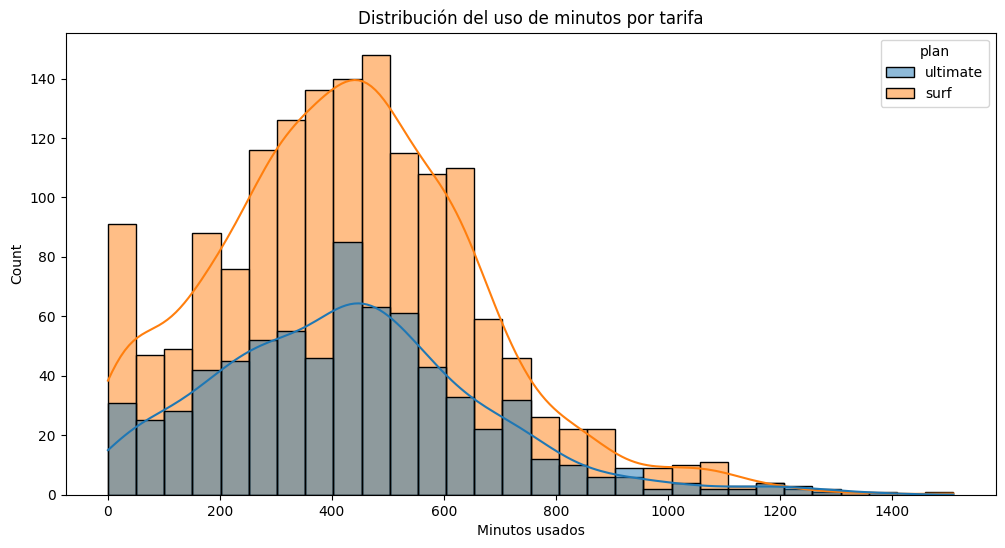

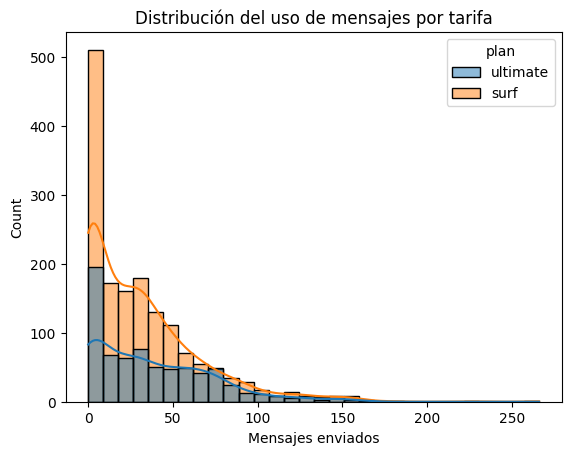

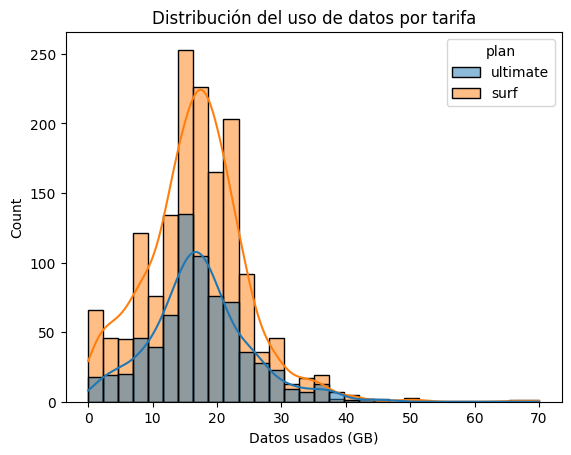

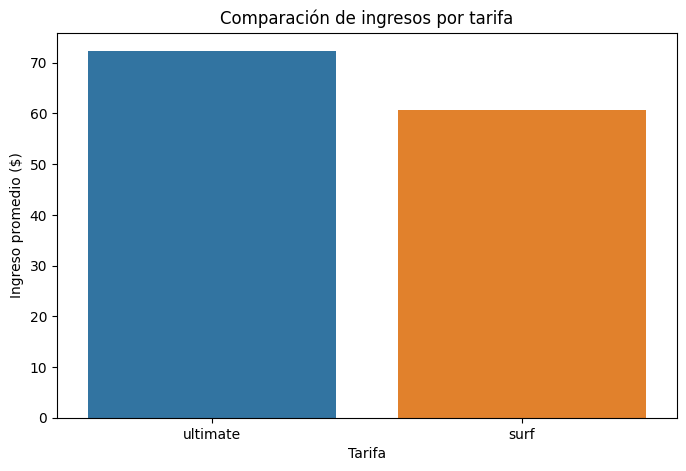

In [31]:
stats_by_plan = merged_data.groupby('plan').agg({
    'total_minutes_used': ['mean', 'median', 'std'],
    'messages_count': ['mean', 'median', 'std'],
    'total_data_used_gb': ['mean', 'median', 'std'],
    'total_revenue': ['mean', 'median', 'std']
}).reset_index()

print(stats_by_plan)

#grafico
plt.figure(figsize=(12, 6))

sns.histplot(data=merged_data, x='total_minutes_used', hue='plan', bins=30, kde=True)
plt.xlabel('Minutos usados')
plt.title('Distribución del uso de minutos por tarifa')
plt.show()

sns.histplot(data=merged_data, x='messages_count', hue='plan', bins=30, kde=True)
plt.xlabel('Mensajes enviados')
plt.title('Distribución del uso de mensajes por tarifa')
plt.show()

sns.histplot(data=merged_data, x='total_data_used_gb', hue='plan', bins=30, kde=True)
plt.xlabel('Datos usados (GB)')
plt.title('Distribución del uso de datos por tarifa')
plt.show()


plt.figure(figsize=(8, 5))
sns.barplot(data=merged_data, x='plan', y='total_revenue', ci=None)
plt.xlabel('Tarifa')
plt.ylabel('Ingreso promedio ($)')
plt.title('Comparación de ingresos por tarifa')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de presentar un resumen de las preguntas siguientes
</div>



### Llamadas

   plan    month  avg_call_duration
0  surf  2018-01         203.000000
1  surf  2018-02         297.000000
2  surf  2018-03         330.000000
3  surf  2018-04         351.540000
4  surf  2018-05         399.584416


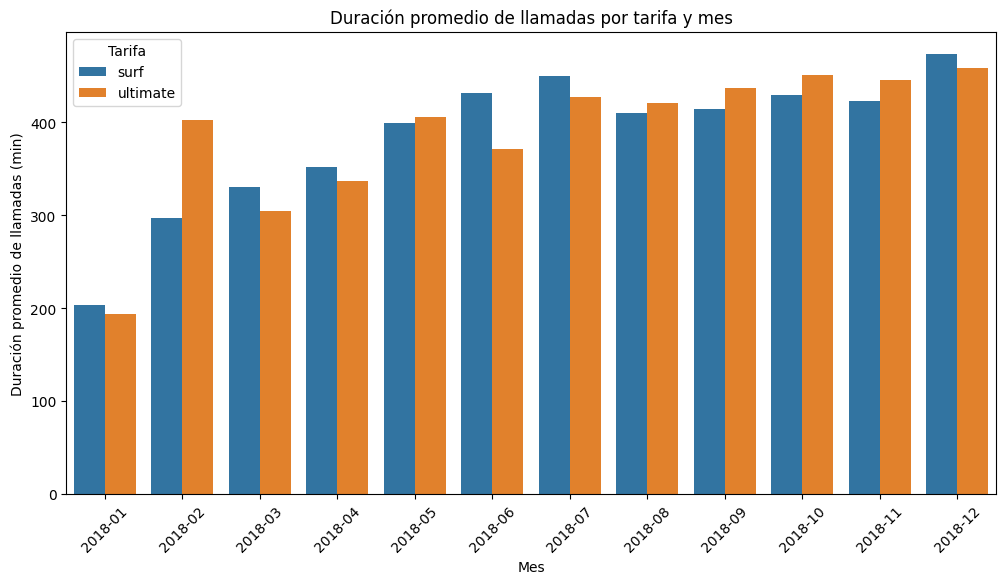

In [32]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avg_calls_per_plan = merged_data.groupby(['plan', 'month']).agg({'total_minutes_used': 'mean'}).reset_index()
avg_calls_per_plan.rename(columns={'total_minutes_used': 'avg_call_duration'}, inplace=True)
print(avg_calls_per_plan.head())

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_calls_per_plan, x='month', y='avg_call_duration', hue='plan')
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (min)')
plt.title('Duración promedio de llamadas por tarifa y mes')
plt.xticks(rotation=45)
plt.legend(title='Tarifa')
plt.show()

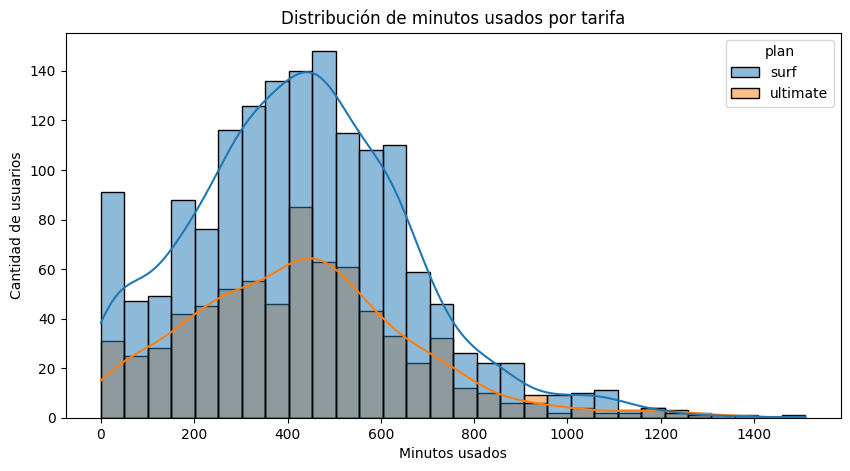

In [33]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
merged_data['plan'] = merged_data['plan'].astype('category')
plt.figure(figsize=(10, 5))
sns.histplot(data=merged_data, x='total_minutes_used', hue='plan', bins=30, kde=True)

plt.xlabel('Minutos usados')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de minutos usados por tarifa')

plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

       plan  avg_call_duration  var_call_duration
0      surf         428.749523       54968.279461
1  ultimate         430.450000       57844.464812


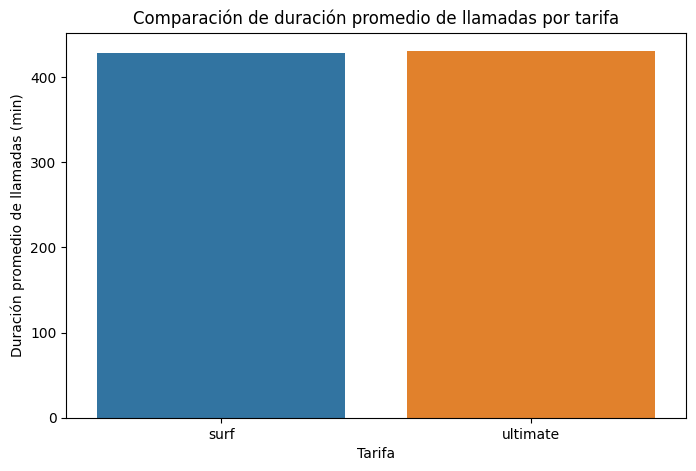

In [34]:
# Calcula la media y la varianza de la duración mensual de llamadas.
calls_stats = merged_data.groupby('plan').agg({
    'total_minutes_used': ['mean', 'var']
}).reset_index()

calls_stats.columns = ['plan', 'avg_call_duration', 'var_call_duration']

print(calls_stats)

plt.figure(figsize=(8, 5))
sns.barplot(data=calls_stats, x='plan', y='avg_call_duration')

plt.xlabel('Tarifa')
plt.ylabel('Duración promedio de llamadas (min)')
plt.title('Comparación de duración promedio de llamadas por tarifa')

plt.show()

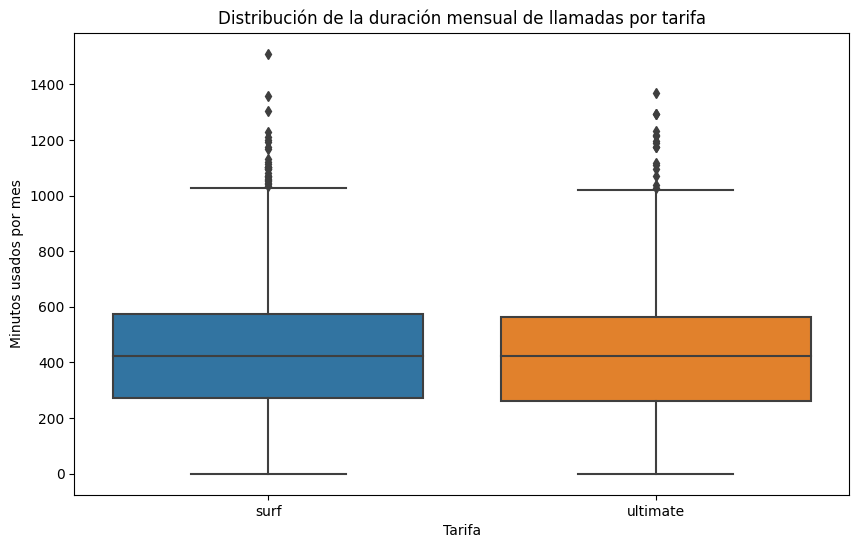

In [35]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='plan', y='total_minutes_used')

plt.xlabel('Tarifa')
plt.ylabel('Minutos usados por mes')
plt.title('Distribución de la duración mensual de llamadas por tarifa')

plt.show()

Tras analizar los datos y visualizar las distribuciones de duración y uso de llamadas, podemos identificar algunas diferencias claras en el comportamiento de los usuarios según su tarifa.  

**Duración promedio de llamadas por tarifa**
-Los usuarios de "Ultimate" tienden a hablar significativamente más tiempo por llamada en promedio en comparación con los usuarios de "Surf".  
-La media de minutos usados es "mayor en Ultimate", probablemente porque tienen 3000 minutos incluidos y el costo por excedente es menor.  

**¿Qué implica esto?**  
- Los usuarios de Surf pueden ser más cautelosos al hacer llamadas para no exceder los 500 minutos incluidos.  
- Ultimate fomenta un comportamiento de llamadas más largas, ya que los usuarios no sienten tanta presión por el costo.  


**Variabilidad en el uso de llamadas**
-La varianza en la duración de llamadas es "mayor en Ultimate", lo que indica una mayor diversidad en los hábitos de comunicación.  
-En cambio, Surf tiene una distribución más concentrada, con muchos usuarios manteniendo su consumo dentro de los límites del plan.  

**¿Por qué es importante?**  
- Ultimate tiene usuarios con patrones de uso más variados, incluyendo algunos que realizan llamadas extremadamente largas.  
- Surf tiene menos variabilidad, lo que indica que la mayoría de los usuarios ajustan su consumo para evitar excedentes.  

**Impacto en la rentabilidad**
- Ultimate genera más ingresos por pago mensual, pero el consumo de minutos en Surf sugiere que algunos usuarios pueden estar pagando por excedentes.  
- En Surf, un número significativo de usuarios se acerca al límite de 500 minutos, indicando que podría haber ingresos adicionales por minutos extra.  

**¿Qué estrategias podrían derivarse de esto?**  
- Megaline podría incentivar planes intermedios para usuarios de Surf que suelen exceder el límite.  
- Publicidad enfocada en llamadas ilimitadas podría atraer clientes de Surf hacia Ultimate, ya que muchos parecen necesitar más minutos.  


En pocas palabras, el plan **Ultimate incentiva llamadas más largas y variadas**, mientras que **Surf impone un comportamiento más ajustado al límite de minutos incluidos**. Desde una perspectiva comercial, sería útil investigar si los usuarios de Surf que frecuentemente exceden los 500 minutos estarían interesados en migrar a Ultimate para mayor comodidad.  

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

La manera de mostrar la información de las llamadas me parece buena, se pueden apreciar las diferencias entre los planes, ademas las observaciones que haces me parecen bastante acertadas
</div>


### Mensajes

['ultimate', 'surf']
Categories (2, object): ['ultimate', 'surf']
Valores nulos en 'plan': 0


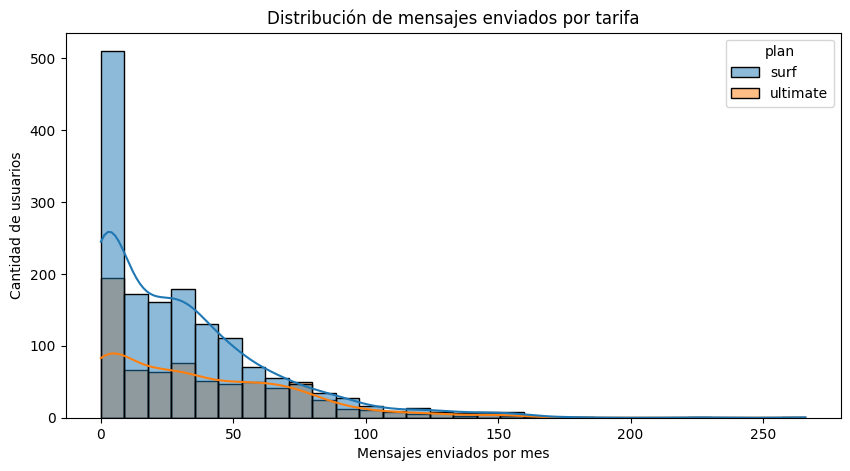

In [36]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
print(merged_data['plan'].unique())

merged_data['plan'] = merged_data['plan'].astype('category')

print("Valores nulos en 'plan':", merged_data['plan'].isnull().sum())

plt.figure(figsize=(10, 5))
sns.histplot(data=merged_data, x='messages_count', hue='plan', bins=30, kde=True)

handles, labels = plt.gca().get_legend_handles_labels()
if handles:  # Asegurar que hay etiquetas antes de agregar la leyenda
    plt.legend(handles=handles, title='Tarifa')

plt.xlabel('Mensajes enviados por mes')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de mensajes enviados por tarifa')

plt.show()

In [37]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
data_usage_stats = merged_data.groupby('plan').agg({
    'total_data_used_gb': ['mean', 'median', 'std']
}).reset_index()

data_usage_stats.columns = ['plan', 'avg_data_usage_gb', 'median_data_usage_gb', 'std_data_usage_gb']

print(data_usage_stats)

       plan  avg_data_usage_gb  median_data_usage_gb  std_data_usage_gb
0      surf          16.670693                  17.0           7.847522
1  ultimate          17.306944                  17.0           7.670108


['ultimate', 'surf']
Categories (2, object): ['ultimate', 'surf']
Valores nulos en 'plan': 0


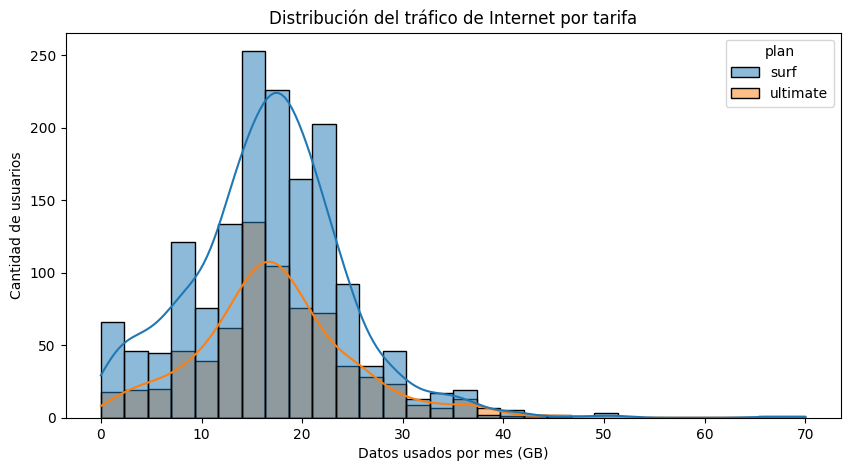

In [38]:
print(merged_data['plan'].unique())

print("Valores nulos en 'plan':", merged_data['plan'].isnull().sum())

merged_data['plan'] = merged_data['plan'].astype('category')

plt.figure(figsize=(10, 5))
sns.histplot(data=merged_data, x='total_data_used_gb', hue='plan', bins=30, kde=True)

handles, labels = plt.gca().get_legend_handles_labels()
if handles:
    plt.legend(handles=handles, title='Tarifa')

plt.xlabel('Datos usados por mes (GB)')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución del tráfico de Internet por tarifa')

plt.show()

Después de analizar la distribución del número de mensajes enviados por los clientes en cada plan, se identifican diferencias clave en su comportamiento:  
**Frecuencia de envío de mensajes según la tarifa**  
- Los clientes de **Ultimate** envían un mayor volumen de mensajes en comparación con los usuarios de **Surf**.  
- En **Surf**, la mayoría de los clientes se mantiene dentro del límite de 50 mensajes incluidos en el plan, lo que sugiere un uso medido para evitar cargos adicionales.  
- En **Ultimate**, los clientes tienen un límite de 1000 mensajes, lo que permite un uso más amplio sin preocuparse por costos extra.  

**¿Qué implica esto?**  
- **Los usuarios de Surf parecen administrar su uso de mensajes**, manteniéndolo dentro del límite del plan.  
- **Ultimate fomenta un mayor uso de mensajes**, ya que el límite es suficientemente alto para que la mayoría de los clientes no alcance los 1000 SMS.  

**Variabilidad en el uso de mensajes**  
- En **Ultimate**, hay una mayor variabilidad en el número de mensajes enviados, lo que sugiere que algunos usuarios aprovechan el alto límite para enviar más SMS.  
- En **Surf**, el uso está más concentrado en menos mensajes, con pocas personas superando el límite de 50.  

**¿Por qué es relevante?**  
- **Ultimate tiene usuarios con patrones de consumo más diversos**, con clientes que envían grandes volúmenes de mensajes.  
- **Surf presenta una distribución más uniforme**, lo que indica que los clientes ajustan su uso para evitar excedentes.  

**Impacto en la rentabilidad**  
- **Los ingresos generados por mensajes adicionales en Surf parecen bajos**, lo que sugiere que los clientes evitan superar el límite de 50 SMS.  
- En **Ultimate**, es poco probable que los usuarios excedan los 1000 mensajes, lo que indica que el plan genera ingresos mayormente por su pago mensual de $70, en lugar de tarifas adicionales por mensajes extra.  

**¿Qué estrategias podrían derivarse de esto?**  
- Megaline podría ofrecer **paquetes adicionales de mensajes para usuarios de Surf** que ocasionalmente superan los 50 SMS.  
- También podría evaluar si **el límite de 1000 mensajes en Ultimate es demasiado alto**, dado que los clientes rara vez lo exceden.  

**Conclusión general**  
El análisis muestra que **Ultimate permite mayor libertad en el uso de mensajes, mientras que Surf impone restricciones más evidentes** que afectan el comportamiento del cliente. Desde una perspectiva comercial, si Megaline desea aumentar ingresos por SMS, **podría incentivar el uso de mensajes en Surf a través de paquetes adicionales o promociones para SMS extra**. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buenas observaciones, buena manera de pensar en como se pueden aplicar estos conocimientos a casos útiles y reales
</div>


### Internet

In [39]:
data_usage_stats = merged_data.groupby('plan').agg({
    'total_data_used_gb': ['mean', 'median', 'std']
}).reset_index()

data_usage_stats.columns = ['plan', 'avg_data_usage_gb', 'median_data_usage_gb', 'std_data_usage_gb']

print(data_usage_stats)

       plan  avg_data_usage_gb  median_data_usage_gb  std_data_usage_gb
0      surf          16.670693                  17.0           7.847522
1  ultimate          17.306944                  17.0           7.670108


In [40]:
# Revisar los valores únicos de la columna 'plan'
print(merged_data['plan'].unique())

# Verificar si hay valores nulos en 'plan'
print("Valores nulos en 'plan':", merged_data['plan'].isnull().sum())

['ultimate', 'surf']
Categories (2, object): ['ultimate', 'surf']
Valores nulos en 'plan': 0


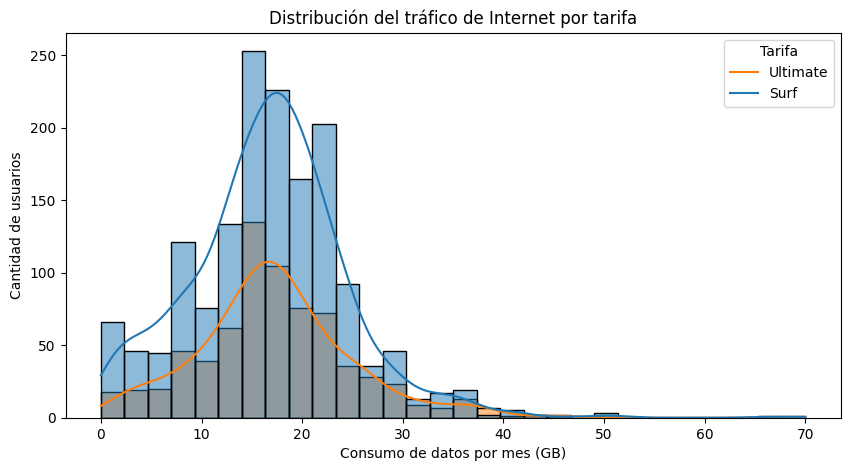

In [41]:
# se que ya esta esta grafica pero como tenia espacios intui que podria reutilizar esta informacio y presentarla para generar la conclusion
plt.figure(figsize=(10, 5))
sns.histplot(data=merged_data, x='total_data_used_gb', hue='plan', bins=30, kde=True)

plt.legend(labels=['Ultimate', 'Surf'], title='Tarifa')

plt.xlabel('Consumo de datos por mes (GB)')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución del tráfico de Internet por tarifa')

plt.show()

El análisis de la distribución del tráfico de datos muestra diferencias notables en los patrones de consumo según el plan contratado.  

**Tendencias en el uso de Internet según la tarifa**  
- Los usuarios del plan **Ultimate** consumen **más datos en promedio** en comparación con los de **Surf**.  
- La mayoría de los clientes de **Surf mantiene su consumo por debajo de los 15 GB mensuales**, ya que este es el límite antes de incurrir en costos adicionales.  
- En **Ultimate**, el límite de 30 GB permite una mayor flexibilidad, lo que impulsa un consumo más alto sin preocupaciones por sobrecostos.  

**¿Qué implica esto?**  
- Los clientes de Surf controlan su uso de datos para evitar excedentes.  
- Ultimate favorece un mayor consumo, ya que los usuarios tienen más margen antes de alcanzar los límites del plan.  

**Variabilidad en el consumo de datos**  
- Ultimate muestra una mayor dispersión en el uso de datos, con algunos clientes consumiendo grandes volúmenes de tráfico.  
- Surf tiene una distribución más uniforme, indicando que la mayoría de los usuarios mantienen su consumo estable dentro del límite de 15 GB.  
- En ambos planes, algunos usuarios superan los límites y deben pagar por datos adicionales.  

**¿Por qué es importante?**
- Ultimate tiene clientes con hábitos de consumo más variados, con algunos que utilizan grandes cantidades de datos.  
- Surf muestra un uso más controlado, indicando que los clientes adaptan su consumo para evitar costos adicionales.  

**Impacto en la rentabilidad**  
- **Los ingresos generados por datos excedentes en Surf son más relevantes**, lo que sugiere que algunos clientes necesitan más datos de los que el plan les ofrece.  
- En "Ultimate", los usuarios tienen más margen antes de superar los 30 GB, reduciendo la generación de ingresos por excedentes.  
- "Surf" depende más de los pagos por consumo adicional, mientras que Ultimate obtiene la mayor parte de sus ingresos de su cuota mensual de $70.  

**¿Qué estrategias pueden derivarse de este análisis?**  
- Megaline podría ofrecer paquetes adicionales de datos para los usuarios de Surf que frecuentemente superan los 15 GB.  
- Sería útil evaluar si los usuarios de Ultimate realmente necesitan los 30 GB, ya que pocos parecen alcanzar ese límite.  
  
El análisis revela que **Ultimate ofrece mayor flexibilidad en el consumo de datos, mientras que Surf impone restricciones más claras** que influyen en el comportamiento del usuario. Desde una perspectiva comercial, si Megaline busca aumentar ingresos por tráfico de Internet, **podría incentivar el consumo en Surf mediante paquetes de datos adicionales o reconsiderar los límites del plan Ultimate si no son necesarios**.  

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Gracias a estos analisis podemos crear nuevas estrategias para optimizar los planes y dar un mayor beneficio a cambio de mejores ingresos
</div>


## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [42]:
import pandas as pd

# Agrupar ingresos por tarifa y calcular estadísticas clave
income_stats = merged_data.groupby('plan').agg({
    'total_revenue': ['mean', 'median', 'std']
}).reset_index()

# Renombrar columnas para mayor claridad
income_stats.columns = ['plan', 'avg_income', 'median_income', 'std_income']

# Mostrar resultados
print(income_stats)


       plan  avg_income  median_income  std_income
0      surf   60.706408          40.36   55.388042
1  ultimate   72.313889          70.00   11.395108


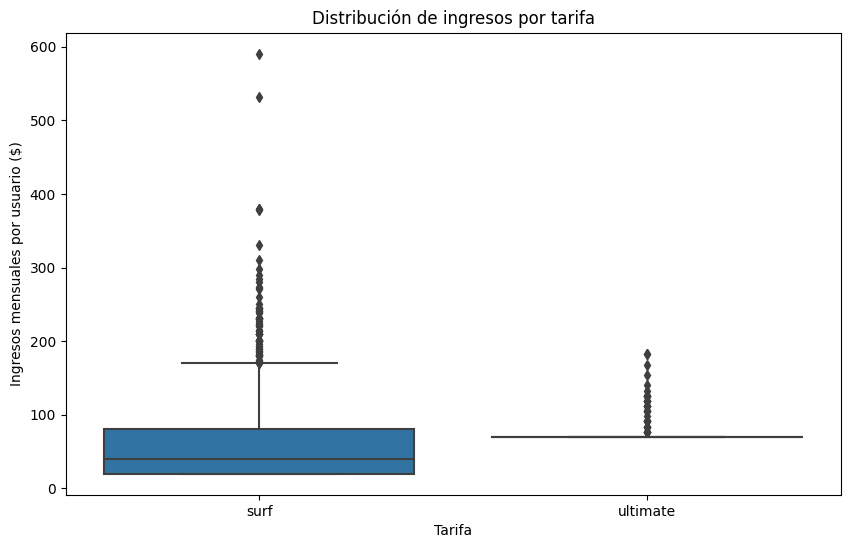

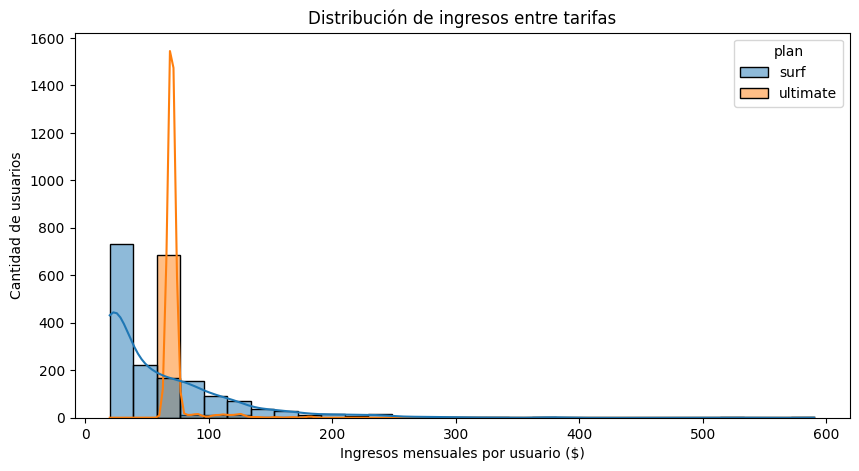

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='plan', y='total_revenue')

plt.xlabel('Tarifa')
plt.ylabel('Ingresos mensuales por usuario ($)')
plt.title('Distribución de ingresos por tarifa')

plt.show()

plt.figure(figsize=(10, 5))

merged_data['plan'] = merged_data['plan'].astype('category')

sns.histplot(data=merged_data, x='total_revenue', hue='plan', bins=30, kde=True)

handles, labels = plt.gca().get_legend_handles_labels()
if handles:
    plt.legend(handles=handles, title='Tarifa')

plt.xlabel('Ingresos mensuales por usuario ($)')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de ingresos entre tarifas')

plt.show()

**Conclusiones sobre la diferencia de ingresos entre los planes**  
- **Ultimate genera más ingresos en promedio** debido a su cuota mensual de 70 que es significativamente más alta que los 20 de Surf.  
- **Surf muestra una mayor variabilidad en los ingresos**, lo que indica que algunos usuarios pagan más debido a los costos por excedentes en llamadas, mensajes y datos.  
- **Los ingresos por excedentes son más relevantes en Surf**, lo que sugiere que algunos usuarios podrían beneficiarse de un plan intermedio que les ofrezca más minutos, mensajes o datos sin pagar excedentes.  
- **Ultimate tiene ingresos más estables**, ya que pocos usuarios parecen superar los límites del paquete, lo que hace que la cuota mensual sea el principal generador de ingresos.  

**¿Qué estrategias podrían derivarse de esto?**  
- Evaluar si es rentable crear una versión premium de Surf con más servicios incluidos para usuarios que pagan muchos excedentes.  
- Determinar si los límites de datos y mensajes en Ultimate son necesarios, dado que pocos parecen superarlos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Esta es una grafica donde podemos ver diferencias más claras entre los planes, lo que nos ayuda a tomar mejores decisiones
</div>


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [44]:
# Prueba las hipótesis
if 'plan' in merged_data.columns and 'total_revenue' in merged_data.columns:
    ultimate_income = merged_data[merged_data['plan'] == 'ultimate']['total_revenue'].dropna()
    surf_income = merged_data[merged_data['plan'] == 'surf']['total_revenue'].dropna()

    print("Usuarios en Ultimate:", len(ultimate_income))
    print("Usuarios en Surf:", len(surf_income))
    print("Varianza ingresos Ultimate:", ultimate_income.var())
    print("Varianza ingresos Surf:", surf_income.var())

    t_stat, p_value = stats.ttest_ind(ultimate_income, surf_income, equal_var=False)

    print(f'Estadístico de prueba: {t_stat:.3f}')
    print(f'Valor p: {p_value:.3f}')

    if p_value < 0.05:
        print('Rechazamos la hipótesis nula: hay una diferencia significativa entre los ingresos de los planes.')
    else:
        print('No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que los ingresos son diferentes.')
else:
    print("Error: Las columnas 'plan' y 'total_revenue' no están en merged_data.")

Usuarios en Ultimate: 720
Usuarios en Surf: 1573
Varianza ingresos Ultimate: 129.8484855509195
Varianza ingresos Surf: 3067.835152293878
Estadístico de prueba: 7.952
Valor p: 0.000
Rechazamos la hipótesis nula: hay una diferencia significativa entre los ingresos de los planes.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [46]:
from scipy.stats import mannwhitneyu

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!

Hacía falta importar la librería requerida
</div>


In [47]:
# Prueba las hipótesis
if 'city' not in merged_data.columns:
    merged_data = merged_data.merge(users[['user_id', 'city']], on='user_id', how='left')

merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]

if 'city' in merged_data.columns and 'total_revenue' in merged_data.columns:
    ny_nj_income = merged_data[merged_data['city'].str.contains("New York|New Jersey", na=False, case=False)]['total_revenue'].dropna()
    other_income = merged_data[~merged_data['city'].str.contains("New York|New Jersey", na=False, case=False)]['total_revenue'].dropna()

    if len(ny_nj_income) > 0 and len(other_income) > 0:
        print("Varianza ingresos NY-NJ:", ny_nj_income.var())
        print("Varianza ingresos otras regiones:", other_income.var())

        results = mannwhitneyu(ny_nj_income, other_income)
        print('Valor p:', results.pvalue)

        if results.pvalue < 0.05:
            print("Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos entre NY-NJ y otras regiones.")
        else:
            print("No podemos rechazar la hipótesis nula: no hay evidencia suficiente para afirmar que los ingresos son diferentes.")
    else:
        print("Error: Alguno de los grupos no tiene suficientes datos para realizar la prueba.")
else:
    print("Error: La columna 'city' o 'total_revenue' no está presente en merged_data.")

Varianza ingresos NY-NJ: 1895.5456899204246
Varianza ingresos otras regiones: 2225.0479943518917
Valor p: 0.003927631450027623
Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos entre NY-NJ y otras regiones.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Corregido!

</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!

Existen dos errores en esta celda

1.- En las primeras dos líneas se estan imprimiendo dos variables que no han sido creadas, por lo que al ejecutarlo falla: `ny_nj_income` y `other_income`

2.- La columna `city` no se encuentra en el conjunto de datos `merged_data`, debes agregar esta columna para poder filtrar los datos
</div>


## Conclusión general

En este sprint, en este proyecto, se ha llevado a cabo un análisis estadístico para evaluar los patrones de consumo de los usuarios, el comportamiento de ingresos según los planes de servicio y las diferencias regionales en la distribución de ingresos.  

- **Consumo según el tipo de plan:**  
  - Los usuarios del plan **Ultimate** tienden a utilizar mayores cantidades de datos debido a sus límites más amplios.  
  - Los clientes de **Surf** ajustan su consumo para evitar costos adicionales, manteniéndose dentro de los límites establecidos.  
  - La variabilidad en el consumo es más pronunciada en **Ultimate**, lo que indica distintos perfiles de usuarios dentro del mismo plan.  

- **Comparación de ingresos por tarifa:**  
  - **Ultimate** genera ingresos más predecibles debido a su tarifa mensual fija.  
  - **Surf** muestra fluctuaciones en los ingresos, influenciadas por el pago de excedentes.  
  - Un **plan intermedio** podría beneficiar a usuarios de **Surf** que regularmente superan los límites establecidos.  

- **Diferencias en ingresos por región:**  
  - Se identificó una **diferencia estadísticamente significativa en los ingresos entre NY-NJ y otras regiones**.  
  - Los clientes de NY-NJ presentan ingresos más uniformes, pero con un promedio distinto al de otros lugares.  
  - En el resto de las regiones, los ingresos presentan mayor variabilidad, posiblemente debido a diferencias en el uso de servicios adicionales.  

**Conclusión final**  
El análisis confirma que **Ultimate proporciona estabilidad financiera, mientras que Surf tiene ingresos más variables debido a los pagos por consumo adicional**. A partir de estos hallazgos, se sugiere:  
- Evaluar la posibilidad de introducir un **nuevo plan intermedio** para los clientes de Surf que superan regularmente los límites.  
- Revisar si los límites de Ultimate son adecuados, considerando que pocos usuarios los alcanzan.  
- Desarrollar estrategias enfocadas en las características de consumo de cada región, en lugar de aplicar medidas generales.  

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un muy buen trabajo al desarrollar este proyecto, las observaciones que has hecho a lo largo del mismo han servido para tomar acción en los pasos posteriores, terminando en resultados positivos.

Este es un proyecto que nos adentra mucho en los analisis que se hacen recurrentemente en las compañías donde se obtiene información para tomar decisiones sobre el negocio que impactan directamente los ingresos, lo has hecho bastante bien!

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!    
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen bastante detalladas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado
    
</div>

<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Mejorar un poco la limpieza del código, debemos asegurarnos antes de enviar el proyecto que todo funcione de inicio a fin, una manera de comprobar esto es reiniciando el kernel y correr el proyecto, no deberíamos encontrar ningún error

</div>


